**Task 2. Part 1.**

In [783]:
import numpy as np
from scipy import linalg
import timeit
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import time
from tqdm import tqdm
import decimal
from scipy.optimize import curve_fit
from scipy.optimize import minimize
from scipy.optimize import bisect
from scipy.optimize import minimize_scalar
from scipy.optimize import golden
from scipy.optimize import brute
import decimal
import asteval
from lmfit import Model
from lmfit import Parameters
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import math

In [309]:
#decorator for logging function calls

def call_counter(func):
    def helper(*args, **kwargs):
        helper.calls += 1
        return func(*args, **kwargs)
    helper.calls = 0
    helper.__name__= func.__name__

    return helper


In [492]:
#define functions
@call_counter
def cubic(x):
    if type(x) == float and (x < 0.001 or x>1): #this is instead of the resctiction for golden search
        return 9999999
    return x**3

@call_counter
def absolute(x):
    return abs(x-0.2)

@call_counter
def sinusoid(x):
    if type(x) == float and (x < 0.001 or x>1): #this is instead of the resctiction for golden search
        return 9999999   
    return x*np.sin(1/x)


In [791]:
#define optimization methods

def exhaustive(func, epsilon, bounds):
    func.calls=0
    x = bounds[0]
    f_minimum = func(x)
    minimum = x
    while x <= bounds[1]:
        x += epsilon
        y = func(x)
        if y < f_minimum:
            f_minimum = y  
            minimum = x
            
    print("Function calls: ", func.calls)
    print("Minimum at: ",minimum)
    return minimum, f_minimum


def gold(func, epsilon, bounds):
    func.calls = 0
    results = minimize_scalar(func, method="golden")
    print("Function calls: ", func.calls)
    print("Minimum at: ",results['x'])
    return results['x'], results['fun']

def dichotomy(func, epsilon, bounds):
    func.calls = 0
    delta=epsilon/2
    a,b = bounds
    while (b-a) > epsilon:
        x1=(a+b-delta)/2
        x2=(a+b+delta)/2
        if func(x1) <= func(x2): 
            a = a
            b = x2
        else:
            a = x1
            b=b
    print("Function calls: ", func.calls)
    print("Minimum at: ", b)
    return b, func(b)
    
    

In [792]:
arr = np.arange(0,1,0.001)
arr2= np.arange(0.01,1,0.001)

In [793]:
cubes = cubic(arr)
absolutes = absolute(arr)
sinusoids = sinusoid(arr2)

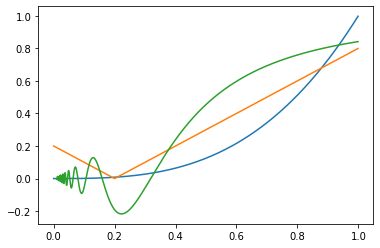

In [794]:
plt.plot(arr, cubes)
plt.plot(arr, absolutes)
plt.plot(arr2, sinusoids)
plt.show()

x^3 minimization with dichotomy search
Function calls:  22
Minimum at:  0.0019641113281250004
'x*sin(1/x)' minimization with dichotomy search
Function calls:  22
Minimum at:  0.22308789062499995
'|x-0.2|' minimization with dichotomy search
Function calls:  22
Minimum at:  0.20059521484374995
x^3 minimization with golden section search
Function calls:  58
Minimum at:  0.0010000000044787898
'x*sin(1/x)' minimization with golden search
Function calls:  47
Minimum at:  0.22254815864311012
'|x-0.2|' minimization with golden search
Function calls:  47
Minimum at:  0.20000000078341074
x^3 minimization with exhaustive search
Function calls:  1001
Minimum at:  0
'x*sin(1/x)' minimization with exhaustive search
Function calls:  991
Minimum at:  0.22300000000000017
'x*sin(1/x)' minimization with exhaustive search
Function calls:  1001
Minimum at:  0.20000000000000015


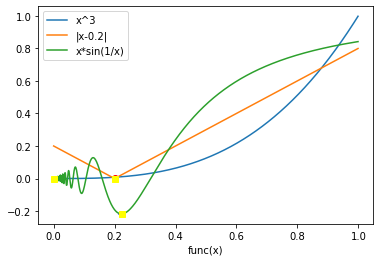

In [797]:
plt.plot(arr, cubes, label="x^3")
plt.plot(arr, absolutes, label="|x-0.2|")
plt.plot(arr2, sinusoids, label="x*sin(1/x)")

print("x^3 minimization with dichotomy search")
plt.plot(*dichotomy(cubic,0.001,(0,1)), 'ro', color='red')
print("'x*sin(1/x)' minimization with dichotomy search")
plt.plot(*dichotomy(sinusoid,0.001,(0.01,1)), 'ro', color='red')
print("'|x-0.2|' minimization with dichotomy search")
plt.plot(*dichotomy(absolute,0.001,(0,1)), 'ro', color='red')

print("x^3 minimization with golden section search")
plt.plot(*gold(cubic,0.001,(0,1)), '+', color='blue')
print("'x*sin(1/x)' minimization with golden search")
plt.plot(*gold(sinusoid,0.001,(0.01,1)), '+', color='blue')
print("'|x-0.2|' minimization with golden search")
plt.plot(*gold(absolute,0.001,(0,1)), '+', color='blue')

print("x^3 minimization with exhaustive search")
plt.plot(*exhaustive(cubic,0.001,(0,1)), 'bs',  color='yellow')
print("'x*sin(1/x)' minimization with exhaustive search")
plt.plot(*exhaustive(sinusoid,0.001,(0.01,1)), 'bs', color='yellow')
print("'x*sin(1/x)' minimization with exhaustive search")
plt.plot(*exhaustive(absolute,0.001,(0,1)), 'bs', color='yellow')

plt.xlabel("x")
plt.xlabel("func(x)")
plt.legend()
plt.show()

**Part 2**

In [517]:
alpha = random.random()
betha = random.random()
x = [i/100 for i in range(101)]
y = [alpha*x_i + betha + np.random.normal(loc=0.0, scale=1.0) for x_i in x]     

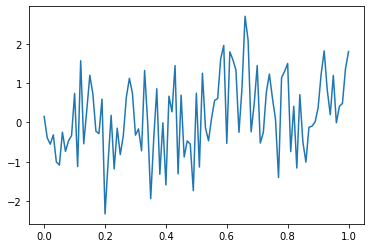

In [520]:
plt.plot(x,y)

In [586]:
#define functions for approximation

def func1(x,a,b):
    return a*x+b


def func2(x,a,b):
    return a/(1+b*x)

In [749]:
#define loss function
def mserror(a,b,y,func):
    x = np.arange(0,1.01,0.01)
    return np.sum((func(x,a,b)-y)**2)
    

/Users/vladimiruspenskiy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


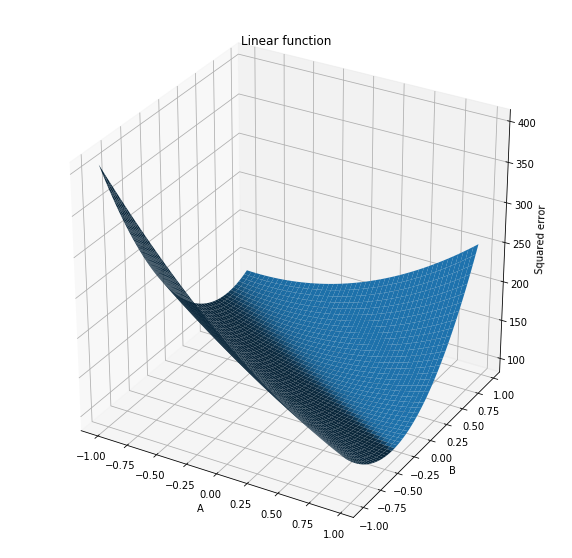

In [777]:
# Let's draw the surface

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')


a = np.arange(-1, 1, 0.04)
b = np.arange(-1, 1, 0.04)
A,B  = np.meshgrid(a,b)
zs = np.array([mserror(a,b,y,func1) for a,b in zip(np.ravel(A), np.ravel(B))])
Z = zs.reshape(A.shape)

ax.plot_surface(A,B,Z)
ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('Squared error')
ax.set_title("Linear function")
fig.show()


/Users/vladimiruspenskiy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/vladimiruspenskiy/opt/anaconda3/lib/python3.7/site-packages/mpl_toolkits/mplot3d/axes3d.py:1727: RuntimeWarning: invalid value encountered in subtract
  v1[poly_i, :] = ps[i1, :] - ps[i2, :]
/Users/vladimiruspenskiy/opt/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:1596: RuntimeWarning: invalid value encountered in multiply
  multiply(a1, b2, out=cp0)
/Users/vladimiruspenskiy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


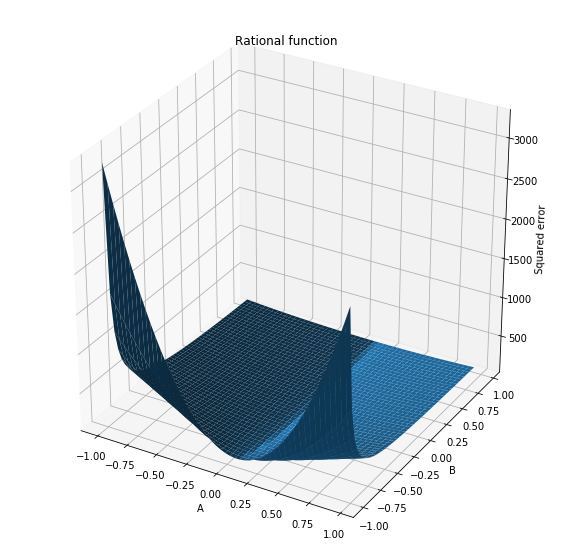

In [778]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')


a = np.arange(-1, 1, 0.04)
b = np.arange(-1, 1, 0.04)
A,B  = np.meshgrid(a,b)
zs = np.array([mserror(a,b,y,func2) for a,b in zip(np.ravel(A), np.ravel(B))])
Z = zs.reshape(A.shape)

ax.plot_surface(A,B,Z)
ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('Squared error')
ax.set_title("Rational function")
fig.show()

In [597]:
#define algorithms

def brute_force(func, loss_f, y):
    minimum = float('inf')
    best = (1,1)
    a = np.arange(0,1,0.01)
    b = np.arange(0,1,0.01)
    for i in a:
        for j in b:
            value = loss_f(i,j,y,func)
            if value < minimum:
                minimum = value
                best = (i,j)
    return best
   

In [607]:
guesses1 = brute_force(func1,mserror,y)
estimates1 = [func1(x_i,*guesses1) for x_i in x]
print(guesses1)
guesses2 = brute_force(func2,mserror,y)
print(guesses2)
estimates2 = [func1(x_i,*guesses2) for x_i in x]


(0.53, 0.0)
(0.17, 0.0)


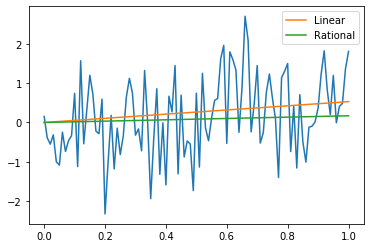

In [609]:
plt.plot(x,y)
plt.plot(x,estimates1, label="Linear")
plt.plot(x,estimates2, label = "Rational")
plt.legend()
plt.show()

In [798]:
#define models of brute force, Nelder-Mead, and Gradient descent from the lmfit package for the linear function

f1model = Model(func1)
print('parameter names: {}'.format(f1model.param_names))
print('independent variables: {}'.format(f1model.independent_vars))

params1 = Parameters()
params1.add('a', value=0, min=-1, max=1,brute_step=0.001)
params1.add('b', value=0, min=-1, max=1, brute_step=0.001)

result1_nelder = f1model.fit(y, params1, x=x, method="nelder")
result1_brute = f1model.fit(y, params1, x=x, method="brute")
result1_gd = f1model.fit(y, params1, x=x, method="gd")


parameter names: ['a', 'b']
independent variables: ['x']


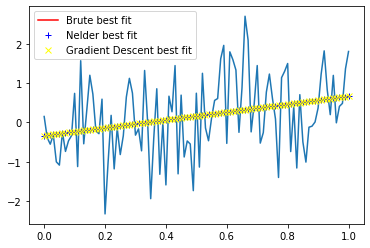

In [804]:
plt.plot(x, y,)
plt.plot(x, result1_brute.best_fit, 'r-',color='red', label='Brute best fit')
plt.plot(x, result1_nelder.best_fit, '+', color='blue', label='Nelder best fit')
plt.plot(x, result1_gd.best_fit, 'x', color='yellow', label='Gradient Descent best fit')

plt.legend(loc='best')
plt.show()

In [800]:
result1_brute

In [801]:
result1_nelder

In [802]:
result1_gd

In [806]:
#define models for the rational function
f2model = Model(func2)
print('parameter names: {}'.format(f2model.param_names))
print('independent variables: {}'.format(f2model.independent_vars))

params2 = Parameters()
params2.add('a', value=0, min=-0.5, max=1,brute_step=0.001)
params2.add('b', value=0, min=--0.5, max=1, brute_step=0.001)

result2_nelder = f2model.fit(y, params2, x=x, method="nelder")
result2_brute = f2model.fit(y, params2, x=x, method="brute")
result2_gd = f2model.fit(y, params2, x=x, method="gd")

parameter names: ['a', 'b']
independent variables: ['x']


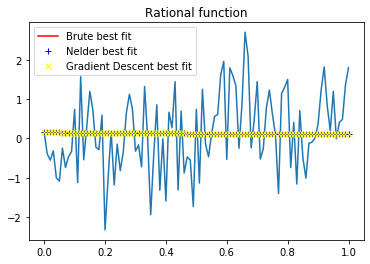

In [807]:
plt.plot(x, y,)
plt.plot(x, result2_brute.best_fit, 'r-',color='red', label='Brute best fit')
plt.plot(x, result2_nelder.best_fit, '+', color='blue', label='Nelder best fit')
plt.plot(x, result2_gd.best_fit, 'x', color='yellow', label='Gradient Descent best fit')
plt.title("Rational function")
plt.legend(loc='best')
plt.show()

In [808]:
result1_brute

In [809]:
result1_nelder

In [810]:
result1_gd